In [1]:
#The link of thedataset: https://github.com/TheiScale/YouTube-Video-Notes/blob/main/Air%20bnb%20Project/compressed_data.csv.gz

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset
data=pd.read_csv(r'C:\Users\User\Downloads\compressed_data.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_16496\932734241.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r'C:\Users\User\Downloads\compressed_data.csv')


In [4]:
# first 5 rows of the dataset
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
# Total shape of the dataset
data.shape

(102599, 26)

In [6]:
# Full data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [7]:
# checking the null values of the dataset
data.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [8]:
# handling the missing values
data['last review']=pd.to_datetime(data['last review'],errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [10]:
data.fillna({'reviews per month':0,'last review':data['last review'].min()},inplace=True)

In [11]:
data.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                            0
reviews per month                      0
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [12]:
data.dropna(subset=['NAME','host id'],inplace=True)

In [13]:
data=data.drop(columns=['house_rules','license'],errors='ignore')

In [14]:
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)
data['service fee'] = data['service fee'].replace('[\$,]', '', regex=True).astype(float)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102349 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102349 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102349 non-null  int64         
 3   host_identity_verified          102072 non-null  object        
 4   host name                       101949 non-null  object        
 5   neighbourhood group             102322 non-null  object        
 6   neighbourhood                   102333 non-null  object        
 7   lat                             102341 non-null  float64       
 8   long                            102341 non-null  float64       
 9   country                         101822 non-null  object        
 10  country code                    102226 non-null  object      

# remove duplicates

In [16]:
data = data.drop_duplicates()

In [17]:
data.shape

(101808, 24)

In [18]:
# descriptive statistics
data.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.018080e+05,1.018080e+05,101800.000000,101800.000000,101603.000000,101564.000000,101535.000000,101414.000000,101626.000000,101808,101808.000000,101497.000000,101490.000000,101378.000000
mean,2.920168e+07,4.926430e+10,40.728085,-73.949658,2012.489592,625.375015,125.042970,8.108545,27.488940,2018-05-15 03:55:35.219236096,1.162149,3.278836,7.942044,141.062311
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.510860e+07,2.459939e+10,40.688720,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-31 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.920868e+07,4.912780e+10,40.722290,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-22 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.329329e+07,7.399769e+10,40.762760,-73.932347,2018.000000,913.000000,183.000000,5.000000,30.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626700e+07,2.853580e+10,0.055856,0.049505,5.765518,331.611632,66.314034,30.325854,49.521772,NaN,1.682869,1.285050,32.276595,135.435164


# Visualization

# What is the distribution of listing price?

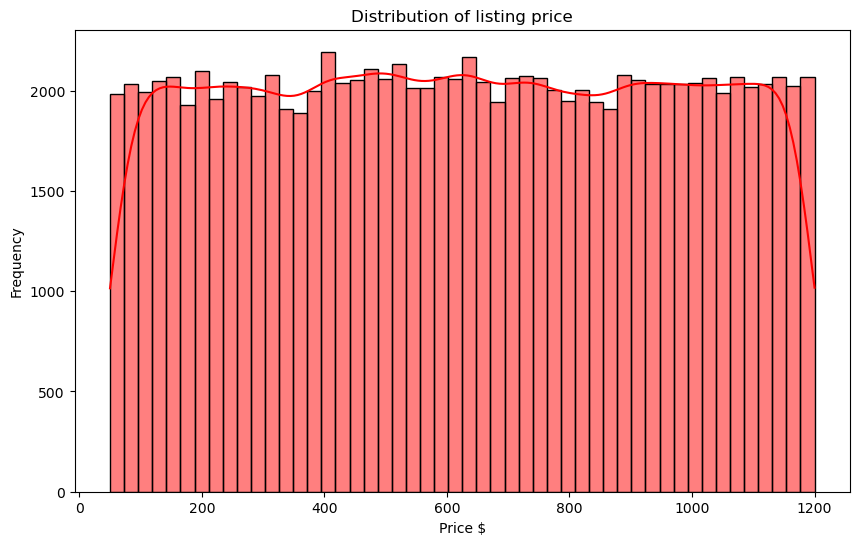

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(data['price'],bins=50,kde=True,color='red')
plt.title('Distribution of listing price')
plt.xlabel('Price $')
plt.ylabel('Frequency')
plt.show()

In [21]:
#The histogram shows a fairly even distribution of listing prices across different price ranges,
#indicating no particular concentration of listings in any specific price range, 
#The kde line helps visualize this even spread more clearly,
#confirming that the dataset contains listings with a wide variety of prices. 

#How are different room types distributed?

In [23]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [25]:
data['room type'].value_counts()

room type
Entire home/apt    53303
Private room       46188
Shared room         2202
Hotel room           115
Name: count, dtype: int64

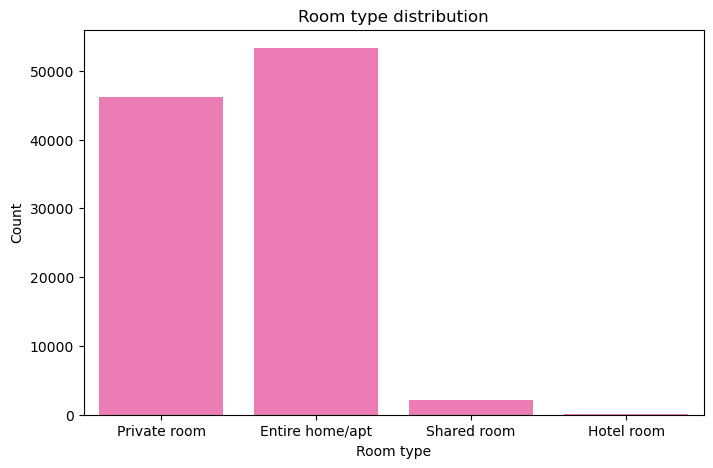

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x='room type',data=data,color='hotpink')
plt.title('Room type distribution')
plt.xlabel('Room type')
plt.ylabel('Count')
plt.show()

# How are listing distributed across different neighbourhood?

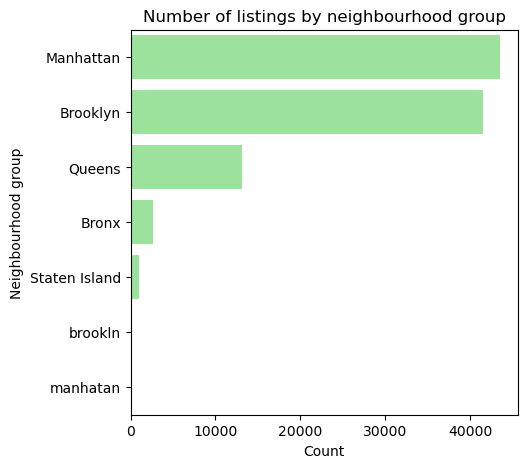

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(y='neighbourhood group',data=data,color='lightgreen',order=data['neighbourhood group'].value_counts().index)
plt.title('Number of listings by neighbourhood group')
plt.xlabel('Count')
plt.ylabel('Neighbourhood group')
plt.show()

# What is the relationship between price and room type

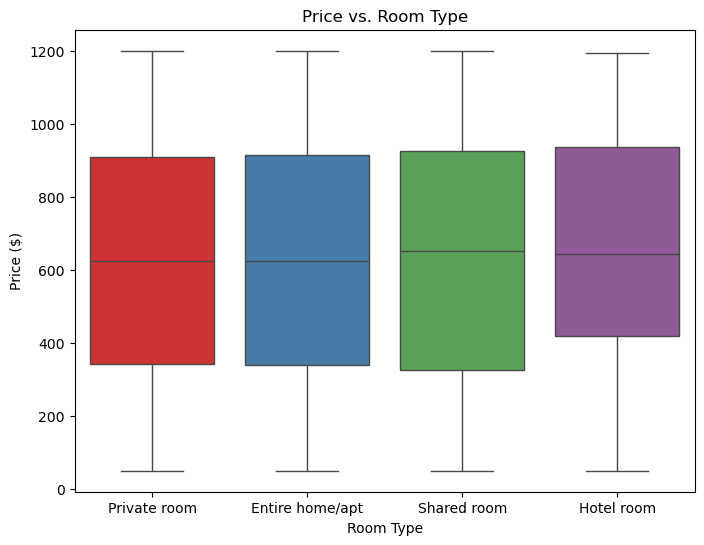

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(x='room type',y='price',hue='room type',data=data,palette='Set1')
plt.title('Price vs. Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

# How has the number of reviews change over with time

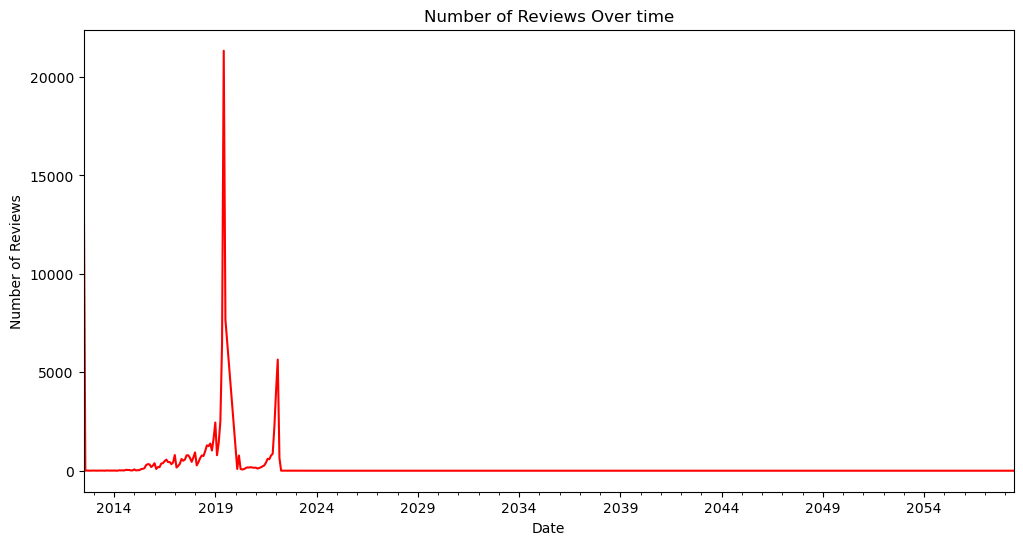

In [33]:
reviews_over_time=data.groupby(data['last review'].dt.to_period('M')).size()
plt.figure(figsize=(12,6))
reviews_over_time.plot(kind='line',color='red')
plt.title('Number of Reviews Over time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()